<a href="https://colab.research.google.com/github/EmanuelAdler/DPI_Project_LP_Detection_And_Recognition/blob/main/Projeto_Final_PDI_2020_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Setup
!pip install yolo34py-gpu
!git clone https://github.com/madhawav/YOLO3-4-Py.git
!sudo apt install tesseract-ocr
!pip install pytesseract

#Download weights and sample images
!wget http://inf.ufrgs.br/~smsilva/real-time-brazilian-alpr/data/fvlpd-net.weights
!wget http://inf.ufrgs.br/~smsilva/real-time-brazilian-alpr/data/fvlpd-net.cfg
!wget http://inf.ufrgs.br/~smsilva/real-time-brazilian-alpr/data/fvlpd-names.txt
!wget http://inf.ufrgs.br/~smsilva/real-time-brazilian-alpr/data/fvlpd.data
!wget http://inf.ufrgs.br/~smsilva/real-time-brazilian-alpr/data/lpscr-net.weights
!wget http://inf.ufrgs.br/~smsilva/real-time-brazilian-alpr/data/lpscr-net.cfg
!wget http://inf.ufrgs.br/~smsilva/real-time-brazilian-alpr/data/lpscr-names.txt
!wget http://inf.ufrgs.br/~smsilva/real-time-brazilian-alpr/data/lpscr.data
!wget http://www.inf.ufrgs.br/~smsilva/real-time-brazilian-alpr/imgs/sample_image.jpg
!wget http://www.inf.ufrgs.br/~smsilva/real-time-brazilian-alpr/imgs/frontal_view_car2.jpg
!wget http://www.inf.ufrgs.br/~smsilva/real-time-brazilian-alpr/imgs/lp_car2.jpg

fatal: destination path 'YOLO3-4-Py' already exists and is not an empty directory.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
--2021-05-24 18:00:42--  http://inf.ufrgs.br/~smsilva/real-time-brazilian-alpr/data/fvlpd-net.weights
Resolving inf.ufrgs.br (inf.ufrgs.br)... 143.54.11.34
Connecting to inf.ufrgs.br (inf.ufrgs.br)|143.54.11.34|:80... connected.
HTTP request sent, awaiting response... 308 Permanent Redirect
Location: http://www.inf.ufrgs.br/~smsilva/real-time-brazilian-alpr/data/fvlpd-net.weights [following]
--2021-05-24 18:00:43--  http://www.inf.ufrgs.br/~smsilva/real-time-brazilian-alpr/data/fvlpd-net.weights
Resolving www.inf.ufrgs.br (www.inf.ufrgs.br)

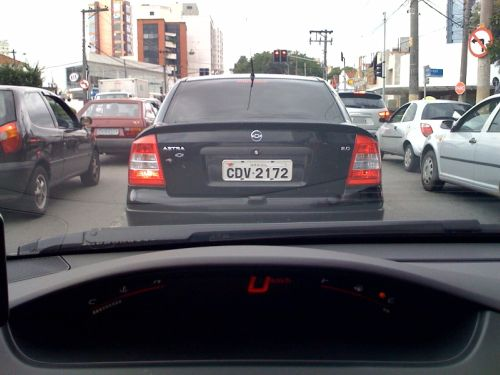

In [ ]:
from pydarknet import Detector, Image
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img = cv2.imread('./images/02.jpg')

cv2_imshow(img)

## Encontrando a frente do carro:

In [ ]:
net = Detector(bytes("./fvlpd-net.cfg", encoding="utf-8"), bytes("./fvlpd-net.weights", encoding="utf-8"), 0, bytes("./fvlpd.data",encoding="utf-8"))
img_darknet = Image(img)
results = net.detect(img_darknet)

box = []
cropped_imgs = []
for category, score, bounds in results:
    img_output = img.copy()
    x, y, w, h = bounds
    box = [int(x - w / 2), int(y - h / 2), int(x + w / 2), int(y + h / 2)]
    cropped_imgs.append(img_output[int(y - h / 2):int(y + h / 2), int(x - w / 2):int(x + w / 2)])
    #cv2.rectangle(img_output, (int(x - w / 2), int(y - h / 2)), (int(x + w / 2), int(y + h / 2)), (255, 0, 0), thickness=2)



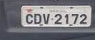

In [ ]:
for car_front in cropped_imgs:
  cv2_imshow(car_front)

## Encontrando a placa:

In [ ]:
car_plates = []
for car_front in cropped_imgs:
  net = Detector(bytes("./fvlpd-net.cfg", encoding="utf-8"), bytes("./fvlpd-net.weights", encoding="utf-8"), 0, bytes("./fvlpd.data",encoding="utf-8"))

  img_darknet = Image(car_front)
  results = net.detect(img_darknet)
  
  for category, score, bounds in results:
      img_output = car_front.copy()
      x, y, w, h = bounds
      box = [int(x - w / 2), int(y - h / 2), int(x + w / 2), int(y + h / 2)]
      car_plates.append(img_output[int(y - h / 2):int(y + h / 2), int(x - w / 2):int(x + w / 2)])
      #cv2.rectangle(img_output, (int(x - w / 2), int(y - h / 2)), (int(x + w / 2), int(y + h / 2)), (255, 0, 0), thickness=2)
  
  if len(car_plates) == 0:
    car_plates.append(car_front)


In [ ]:
for plate in car_plates:
  cv2_imshow(plate)

## Detectando caracteres da placa:



Classificador sugerido no artigo:

In [ ]:
for plate in car_plates:
  net = Detector(bytes("./lpscr-net.cfg", encoding="utf-8"), bytes("./lpscr-net.weights", encoding="utf-8"), 0, bytes("./lpscr.data",encoding="utf-8"))

  img_darknet = Image(plate)
  results = net.detect(img_darknet)
  
  img_output = plate.copy()
  cats = []
  for category, score, bounds in results:
      x, y, w, h = bounds
      box = [int(x - w / 2), int(y - h / 2), int(x + w / 2), int(y + h / 2)]
      cv2.rectangle(img_output, (int(x - w / 2), int(y - h / 2)), (int(x + w / 2), int(y + h / 2)), (255, 0, 0), thickness=2)
      cats.append(category)
  cv2_imshow(img_output)
  print(cats)


['7', '2', '1', '2', '0', 'G']


Classificador usando o PyTesseract OCR e processamento de imagem:

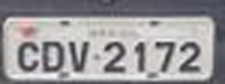

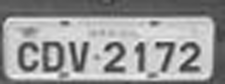

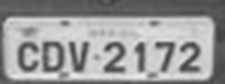

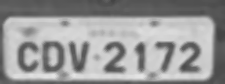

In [ ]:
import pytesseract

blurred_plates = []
for plate in car_plates:
  resized_license_plate = cv2.resize(plate, None, fx = 3, fy = 3, interpolation = cv2.INTER_CUBIC)
  cv2_imshow(resized_license_plate)
  grayscale_license_plate = cv2.cvtColor(resized_license_plate, cv2.COLOR_BGR2GRAY)
  cv2_imshow(grayscale_license_plate)
  gaussian_blur_license_plate = cv2.GaussianBlur(grayscale_license_plate, (5, 5), 0)
  cv2_imshow(gaussian_blur_license_plate)
  median_blur_license_plate = cv2.medianBlur(gaussian_blur_license_plate, 5)
  cv2_imshow(median_blur_license_plate)
  blurred_plates.append(median_blur_license_plate)

In [ ]:
def post_process(result):
  result = result.replace(" ", "")
  result = result.replace(":", "-")
  result = result.replace("'", "-")
  result = result.replace("‘", "-")
  result = result.replace(".", "-")
  result = result.upper()
  
  if result.find('-'):
    splitted = result.split('-')
    splitted[0] = splitted[0][-3:]
    splitted[0] = character_part(splitted[0])
    
    splitted[1] = splitted[1][0:4]
    splitted[1] = number_part(splitted[1])
    
    result = splitted[0] + '-' + splitted[1]

  return result

# A B C D E F G H I J K L M N O P Q R S T U V X W Y Z
# 0 1 2 3 4 5 6 7 8 9

def character_part(plate):
  plate = plate.replace("1", "I")
  plate = plate.replace("0", "O")
  plate = plate.replace("7", "Z")
  plate = plate.replace("\\", "V" )

  return plate

def number_part(plate):
  plate = plate.replace("I", "1")
  plate = plate.replace("L", "1")
  plate = plate.replace("O", "0")
  plate = plate.replace("Q", "0")
  plate = plate.replace("T", "7")

  return plate

In [ ]:
for plate in blurred_plates:
  prediction = pytesseract.image_to_string(plate, lang ='eng', config ='--oem 3 -l eng --psm 9 -c tessedit_char_whitelist=-ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789')
  print("Leitura: " + prediction)
  print("Após processamento: " + post_process(prediction))
  print("")

Leitura: CDV.2172

Após processamento: CDV-2172

